<a href="https://colab.research.google.com/github/ldselvera/huggingface/blob/main/02-Diffusers/diffusion_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# !pip install diffusers["torch"] transformers

In [2]:
import torch
import numpy as np

from diffusers import DDPMPipeline, DDPMScheduler, UNet2DModel
from PIL import Image

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/diffusers/models/transformers/transformer_2d.py:34: FutureWarning: `Transformer2DModelOutput` is deprecated and will be removed in version 1.0.0. Importing `Transformer2DModelOutput` from `diffusers.models.transformer_2d` is deprecated and this will be removed in a future version. Please use `from diffusers.models.modeling_outputs import Transformer2DModelOutput`, instead.
  deprecate("Transformer2DModelOutput", "1.0.0", deprecation_message)


In [3]:
ddpm = DDPMPipeline.from_pretrained('google/ddpm-celebahq-256').to('cuda')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/180 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors not found


Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/455M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/790 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/256 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--google--ddpm-celebahq-256/snapshots/cd5c944777ea2668051904ead6cc120739b86c4d: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--google--ddpm-celebahq-256/snapshots/cd5c944777ea2668051904ead6cc120739b86c4d.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


  0%|          | 0/30 [00:00<?, ?it/s]

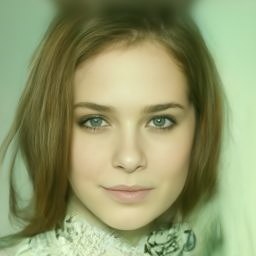

In [4]:
image = ddpm(num_inference_steps=30).images[0]
image

In [21]:
scheduler = DDPMScheduler.from_pretrained("google/ddpm-celebahq-256")
model = UNet2DModel.from_pretrained("google/ddpm-celebahq-256").to("cuda")

An error occurred while trying to fetch google/ddpm-celebahq-256: google/ddpm-celebahq-256 does not appear to have a file named diffusion_pytorch_model.safetensors.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


In [22]:
scheduler.set_timesteps(50)

In [23]:
scheduler.timesteps

tensor([980, 960, 940, 920, 900, 880, 860, 840, 820, 800, 780, 760, 740, 720,
        700, 680, 660, 640, 620, 600, 580, 560, 540, 520, 500, 480, 460, 440,
        420, 400, 380, 360, 340, 320, 300, 280, 260, 240, 220, 200, 180, 160,
        140, 120, 100,  80,  60,  40,  20,   0])

In [28]:
# Get the sample size from the model configuration
sample_size = model.config.sample_size

# Create random noise with the same shape as the desired output
noise = torch.randn((1, 3, sample_size, sample_size), device="cuda")

In [30]:
# Initialize the input to be the random noise we created
input = noise

# Loop over each timestep
for t in scheduler.timesteps:
    with torch.no_grad():  # No gradient calculation is needed
        # Get the noisy residual from the model
        noisy_residual = model(input, t).sample
    # Predict the image at the previous timestep
    previous_noisy_sample = scheduler.step(noisy_residual, t, input).prev_sample
    # Update the input for the next iteration
    input = previous_noisy_sample

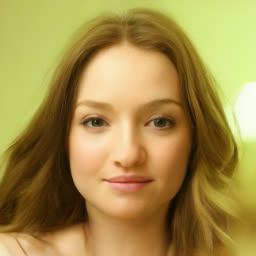

In [33]:
# Normalize the image data
image = (input / 2 + 0.5).clamp(0, 1).squeeze()
# Change the shape and type for image conversion
image = (image.permute(1, 2, 0) * 255).round().to(torch.uint8).cpu().numpy()
# Create a PIL image
image = Image.fromarray(image)
image

An error occurred while trying to fetch google/ddpm-celebahq-256: google/ddpm-celebahq-256 does not appear to have a file named diffusion_pytorch_model.safetensors.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
